In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Regressão Linear

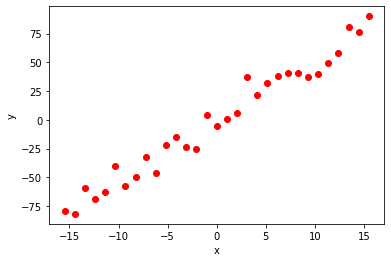

In [17]:
# true_a = 5
# true_b = 0
# true_sd = 10
# sample_size = 31

# x_i = np.linspace(-(sample_size/2),sample_size/2,sample_size)
# y_i = true_a*x_i + true_b + true_sd*np.random.randn(*x_i.shape)

plt.scatter(x_i,y_i,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('linear-data.png',transparent=True, dpi=300)
plt.show()

In [11]:
from scipy.stats import norm

def log_likelihood(param):
    a = param[0]     # intercept
    b = param[1]     # slope
    sd = param[2]    # error
    
    # Normal distribution
    return np.sum(np.log(norm(a*x_i  + b, sd).pdf(y_i)))

In [12]:

# Dimensão
d = 3

# Parametros
param_config = [
    {"name": "a", "estimate": 4.7, "limits": [4,6.5]},
    {"name": "b", "estimate": 0.1, "limits": [-10,10]},
    {"name": "sd", "estimate": 9, "limits": [6,21]},
]
inf_lim = np.array([ x['limits'][0] for x in param_config])
sup_lim = np.array([ x['limits'][-1] for x in param_config])
step = np.array([ (x['limits'][-1]-x['limits'][0])/5 for x in param_config])
raw_estimates = np.array([ x['estimate'] for x in param_config])

def reflect_proposal(epsilon):
    epsilon = np.where(x0 + epsilon >= inf_lim, epsilon, -epsilon)
    epsilon = np.where(x0 + epsilon <= sup_lim, epsilon, -epsilon)
    return epsilon

# Distribuição proposta
prop_dist = lambda x: step * np.random.uniform(-1,1,d)

# Escolha um candidato
x0 = raw_estimates
log_p0 = log_likelihood(x0)

# Iniciando a Amostra
sample = [x0]

# Iterações
for i in range(100000):
    
    try:
        # Novo candidato
        epsilon = reflect_proposal(prop_dist(x0))
        x_cand = x0 + epsilon
        log_p_cand = log_likelihood(x_cand)

        # Probabilidade de aceitação
        A = min(1, np.exp(log_p_cand-log_p0))

        if np.random.random() <= A:
            x0 = x_cand
            p0 = p_cand

        sample.append(x0)
        
    except Exception as err:
        pass
    
sample = np.array(sample)
df_sample = pd.DataFrame(sample, columns = [ x['name'] for x in param_config])

In [42]:
df_sample.head()

,a,b,sd
0,4.700000,0.100000,9.000000
1,4.700000,0.100000,9.000000
2,4.700000,0.100000,9.000000
3,5.227991,-2.368194,10.763232
4,5.437334,-2.106831,12.036261


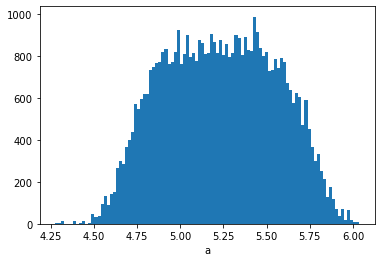

a = 5.23 +- 0.32


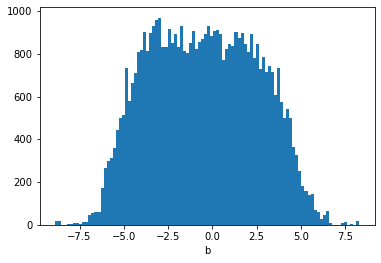

b = -0.49 +- 3.01


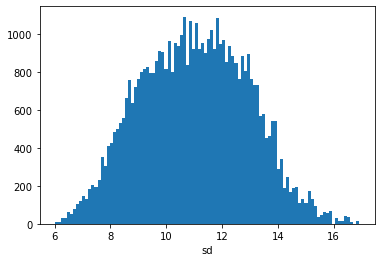

sd = 11.02 +- 1.92


In [18]:
for i in range(d):
    plt.hist(sample[:,i], bins=100)
    plt.xlabel(param_config[i]['name'])
    plt.savefig(f"linear-par-est-{param_config[i]['name']}.png",transparent=True, dpi=300)
    plt.show()
    print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

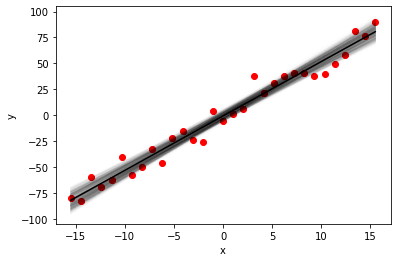

In [46]:
sample_plot = df_sample.sample(700)


for i in range(len(sample_plot)):
    plt.plot(x_i,sample_plot['a'].iloc[i]*x_i+sample_plot['b'].iloc[i],color='black', alpha=0.008)

plt.plot(x_i,5.23*x_i-0.49,color='black')    

plt.scatter(x_i,y_i, color='red')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig(f"linear-confidence.png",transparent=True, dpi=300)
plt.show()

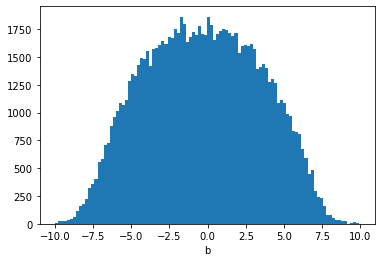

b = -0.32 +- 3.74


In [337]:
i = 1
plt.hist(sample[:,i], bins=100)
plt.xlabel(param_config[i]['name'])
plt.show()
print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

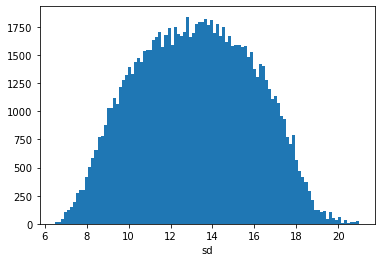

sd = 13.19 +- 2.75


In [338]:
i = 2
plt.hist(sample[:,i], bins=100)
plt.xlabel(param_config[i]['name'])
plt.show()
print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

In [344]:
df_sample.corr()

,a,b,sd
a,1.000000,-0.002110,-0.021018
b,-0.002110,1.000000,0.006901
sd,-0.021018,0.006901,1.000000


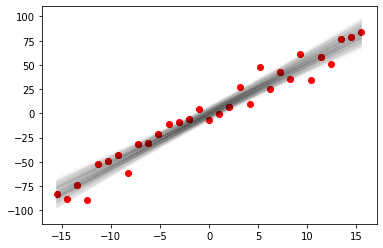

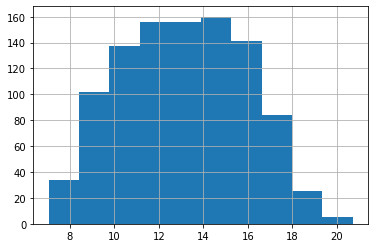

In [350]:
sample_plot['sd'].hist()

In [374]:
import statsmodels.api as sm
import numpy as np

In [383]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     664.5
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.53e-21
Time:                        04:43:58   Log-Likelihood:                -116.24
No. Observations:                  31   AIC:                             236.5
Df Residuals:                      29   BIC:                             239.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3770      1.910     -0.197      0.845      -4.283       3.529
x1             5.3271      0.207     25.779      0.000       4.904       5.750
==============================================================================
Omnibus:                        1.299   Durbin-Watson:                   2.593
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.209
Skew:                          -0.436   Prob(JB):                        0.546
Kurtosis:                       2.580   Cond. No.                         9.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regressão Linear com Outlier

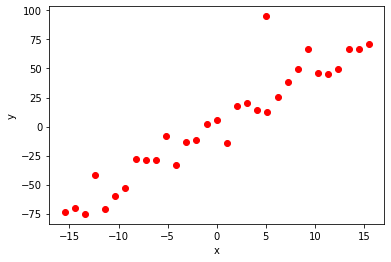

In [411]:
true_a = 5
true_b = 0
true_sd = 10
sample_size = 31

x = np.linspace(-(sample_size/2),sample_size/2,sample_size)
y = true_a*x + true_b + true_sd*np.random.randn(*x.shape)
x = np.append(x,5)
y = np.append(y,95)

plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [412]:
def log_likelihood(param):
    a = param[0]     # intercept
    b = param[1]     # slope
    sd = param[2]
    
    y_predict = a*x  + b
    
    #likelihood = np.exp(-0.5 * np.sum(np.square(y_predict - y)) / (sd**2)) / np.sqrt(2*np.pi*sd**2)
    log_like = np.sum(np.log(scipy.stats.norm(y_predict, sd).pdf(y)))
    
    return log_like

In [433]:
# Dimensão
d = 3

# Parametros
param_config = [
    {"name": "a", "estimate": 4.7, "limits": [2,8.5]},
    {"name": "b", "estimate": 0.1, "limits": [-24,24]},
    {"name": "sd", "estimate": 9, "limits": [8,50]},
]
inf_lim = np.array([ x['limits'][0] for x in param_config])
sup_lim = np.array([ x['limits'][-1] for x in param_config])
step = np.array([ (x['limits'][-1]-x['limits'][0])/5 for x in param_config])
raw_estimates = np.array([ x['estimate'] for x in param_config])

def reflect_proposal(epsilon):
    epsilon = np.where(x0 + epsilon >= inf_lim, epsilon, -epsilon)
    epsilon = np.where(x0 + epsilon <= sup_lim, epsilon, -epsilon)
    return epsilon

# Distribuição proposta
prop_dist = lambda x: step * np.random.uniform(-1,1,d)

# Escolha um candidato
x0 = raw_estimates
log_p0 = log_likelihood(x0)

# Iniciando a Amostra
sample = [x0]

# Iterações
for i in range(10000):
    
    try:
        # Novo candidato
        epsilon = reflect_proposal(prop_dist(x0))
        x_cand = x0 + epsilon
        log_p_cand = log_likelihood(x_cand)

        # Probabilidade de aceitação
        A = min(1, np.exp(log_p_cand-log_p0))

        if np.random.random() <= A:
            x0 = x_cand
            p0 = p_cand

        sample.append(x0)
        
    except Exception as err:
        pass
    
sample = np.array(sample)
df_sample = pd.DataFrame(sample, columns = [ x['name'] for x in param_config])

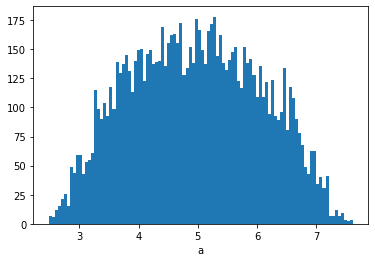

a = 4.96 +- 1.09


In [434]:
i = 0
plt.hist(sample[:,i], bins=100)
plt.xlabel(param_config[i]['name'])
plt.show()
print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

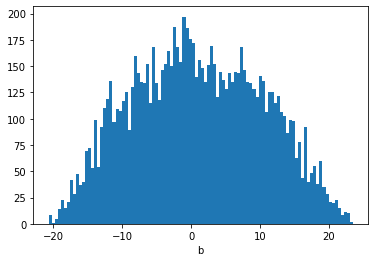

b = 0.95 +- 9.37


In [435]:
i = 1
plt.hist(sample[:,i], bins=100)
plt.xlabel(param_config[i]['name'])
plt.show()
print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

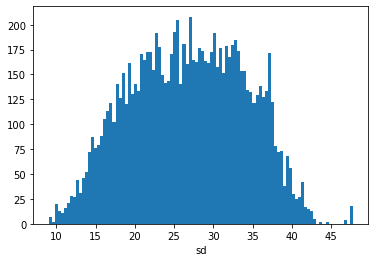

sd = 26.82 +- 7.29


In [436]:
i = 2
plt.hist(sample[:,i], bins=100)
plt.xlabel(param_config[i]['name'])
plt.show()
print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

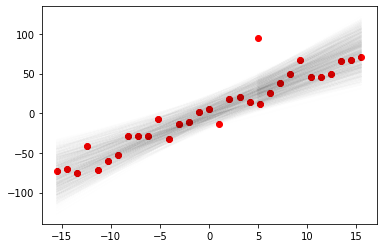

In [437]:
sample_plot = df_sample.sample(1000)


for i in range(len(sample_plot)):
    plt.plot(x,sample_plot['a'].iloc[i]*x+sample_plot['b'].iloc[i],color='black', alpha=0.002)

plt.scatter(x,y, color='red')

plt.show()

# Lasso Regression

In [463]:
def log_likelihood(param):
    a = param[0]     # intercept
    b = param[1]     # slope
    sd = param[2]
    lamb = 2
    
    y_predict = a*x  + b
    
    #likelihood = np.exp(-0.5 * np.sum(np.square(y_predict - y)) / (sd**2)) / np.sqrt(2*np.pi*sd**2)
    log_like = np.sum(np.log(scipy.stats.norm(y_predict, sd).pdf(y)))
    lasso_term = -0.5 * lamb * np.sum(np.abs(param[:3]))
    
    return log_like + lasso_term

In [467]:
# Dimensão
d = 3


# Parametros
param_config = [
    {"name": "a", "estimate": 4.7, "limits": [3,6.5]},
    {"name": "b", "estimate": 0.1, "limits": [-7.5,10]},
    {"name": "sd", "estimate": 9, "limits": [8,24]},
    #{"name": "lambda", "estimate": 0.1, "limits": [-5,5]},
]

inf_lim = np.array([ x['limits'][0] for x in param_config])
sup_lim = np.array([ x['limits'][-1] for x in param_config])
step = np.array([ (x['limits'][-1]-x['limits'][0])/5 for x in param_config])
raw_estimates = np.array([ x['estimate'] for x in param_config])

def reflect_proposal(epsilon):
    epsilon = np.where(x0 + epsilon >= inf_lim, epsilon, -epsilon)
    epsilon = np.where(x0 + epsilon <= sup_lim, epsilon, -epsilon)
    return epsilon

# Distribuição proposta
prop_dist = lambda x: step * np.random.uniform(-1,1,d)

# Escolha um candidato
x0 = raw_estimates
log_p0 = log_likelihood(x0)

# Iniciando a Amostra
sample = [x0]

# Iterações
for i in range(30000):
    
    try:
        # Novo candidato
        epsilon = reflect_proposal(prop_dist(x0))
        x_cand = x0 + epsilon
        log_p_cand = log_likelihood(x_cand)

        # Probabilidade de aceitação
        A = min(1, np.exp(log_p_cand-log_p0))

        if np.random.random() <= A:
            x0 = x_cand
            p0 = p_cand

        sample.append(x0)
        
    except Exception as err:
        pass
    
sample = np.array(sample)
df_sample = pd.DataFrame(sample, columns = [ x['name'] for x in param_config])

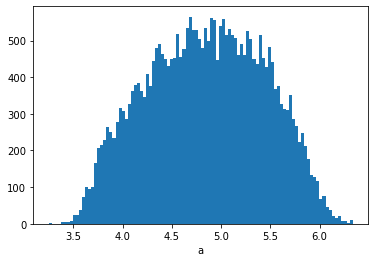

a = 4.84 +- 0.59


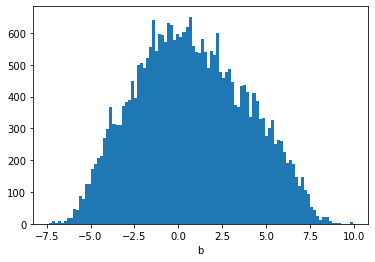

b = 0.74 +- 3.11


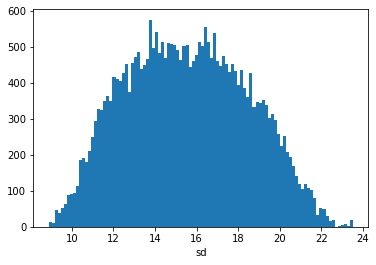

sd = 15.56 +- 2.91


In [468]:
for i in range(d):
    plt.hist(sample[:,i], bins=100)
    plt.xlabel(param_config[i]['name'])
    plt.show()
    print("{} = {:.2f} +- {:.2f}".format(param_config[i]['name'], np.mean(sample[:,i]),np.std(sample[:,i]))) 

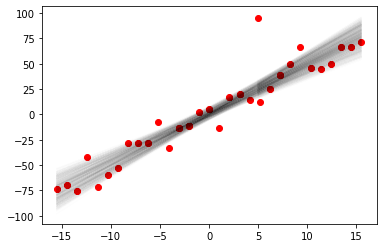

In [469]:
sample_plot = df_sample.sample(1000)


for i in range(len(sample_plot)):
    plt.plot(x,sample_plot['a'].iloc[i]*x+sample_plot['b'].iloc[i],color='black', alpha=0.002)

plt.scatter(x,y, color='red')

plt.show()